# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://learn.wbscodingschool.com/courses/data-science/lessons/%f0%9f%93%9d-5-data-quality/) and use what you've learnt to see how reliable the data is.

In [38]:
import pandas as pd

Load our cleaned DataFrames

In [53]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

## 1.&nbsp; Define Pandas display format

In [54]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [55]:
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [56]:
orders_qu = orders_cl.copy()
orderlines_qu = orderlines_cl.copy()
products_qu = products_cl.copy()

In [57]:
orders_qu['state'].value_counts()

state
Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: count, dtype: int64

In [ ]:
orders_qu = orders_qu.loc[orders_qu['state']=='Completed']
orders_qu

order_id         created_date  total_paid      state
1         241423  2017-11-06 13:10:02      136.15  Completed
2         242832  2017-12-31 17:40:03       15.76  Completed
3         243330  2017-02-16 10:59:38       84.98  Completed
5         245275  2017-06-28 11:35:37      149.00  Completed
6         245595  2017-01-21 12:52:47      112.97  Completed
...          ...                  ...         ...        ...
226544    527042  2018-03-14 11:47:50       18.98  Completed
226572    527070  2018-03-14 11:50:48       24.97  Completed
226576    527074  2018-03-14 11:51:42       24.97  Completed
226598    527096  2018-03-14 11:58:40       34.96  Completed
226614    527112  2018-03-14 12:03:52       14.98  Completed

[46605 rows x 4 columns]

In [72]:
orderlines_qu['id_order'].nunique()

170213

In [58]:
orders_qu['order_id'].nunique()

226904

In [51]:
#orderlines_qu= orderlines_qu.rename(columns={'id_order' :'order_id'})

In [59]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                216250 non-null  int64  
 1   id_order          216250 non-null  int64  
 2   product_id        216250 non-null  int64  
 3   product_quantity  216250 non-null  int64  
 4   sku               216250 non-null  object 
 5   unit_price        216250 non-null  float64
 6   date              216250 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.5+ MB


## 2.&nbsp; Exclude unwanted orders

In [94]:
orders_orderlines = orders_qu.merge(orderlines_qu, right_on='id_order',left_on='order_id', how= 'inner')
orders_orderlines

order_id         created_date  total_paid            state  \
0         241319  2017-01-02 13:35:40       44.99        Cancelled   
1         241423  2017-11-06 13:10:02      136.15        Completed   
2         242832  2017-12-31 17:40:03       15.76        Completed   
3         243330  2017-02-16 10:59:38       84.98        Completed   
4         243784  2017-11-24 13:35:19      157.86        Cancelled   
...          ...                  ...         ...              ...   
216052    527397  2018-03-14 13:56:38       42.99      Place Order   
216053    527398  2018-03-14 13:57:25       42.99  Shopping Basket   
216054    527399  2018-03-14 13:57:34      141.58  Shopping Basket   
216055    527400  2018-03-14 13:57:41       19.98  Shopping Basket   
216056    527401  2018-03-14 13:58:36       18.98      Place Order   

       filtered_orders       id  id_order  product_id  product_quantity  \
0                 True  1121139    241319           0                 1   
1                 True  1398738    241423           0                 1   
2                 True  1529178    242832           0                 1   
3                 True  1181923    243330           0                 1   
4                 True  1437153    243784           0                 3   
...                ...      ...       ...         ...               ...   
216052             NaN  1650198    527397           0                 1   
216053             NaN  1650199    527398           0                 1   
216054             NaN  1650200    527399           0                 1   
216055             NaN  1650201    527400           0                 2   
216056             NaN  1650203    527401           0                 1   

            sku  unit_price                 date filtered_orderlines  
0       JBL0123       44.99  2017-01-02 12:26:59                True  
1       LAC0212      129.16  2017-11-06 12:47:20                True  
2       PAR0074       10.77  2017-12-31 17:26:40                True  
3       OWC0074       77.99  2017-02-15 17:07:44                True  
4       PHI0080       51.29  2017-11-24 13:27:41                True  
...         ...         ...                  ...                 ...  
216052  JBL0122       42.99  2018-03-14 13:56:38                 NaN  
216053  JBL0122       42.99  2018-03-14 13:57:25                 NaN  
216054  PAC0653      141.58  2018-03-14 13:57:34                 NaN  
216055  APP0698        9.99  2018-03-14 13:57:41                 NaN  
216056  APP0927       13.99  2018-03-14 13:58:36                 NaN  

[216057 rows x 13 columns]

In [95]:
orders_orderlines['order_id'].nunique()

170069

In [96]:
orders_orderlines['id_order'].nunique()

170069

In [97]:
order_ids = orders_orderlines ['order_id'].unique()

In [98]:
common_orders = set(orderlines_qu['id_order']).intersection(set(orders_qu['order_id']))

# If you want to filter `orderlines_cl` to include only the common orders:
filtered_orderlines = orderlines_qu[orderlines_qu['id_order'].isin(common_orders)]

# If you want to filter `orders_cl` to include only the common orders:
filtered_orders = orders_qu[orders_qu['order_id'].isin(common_orders)]

In [86]:
pd.Series(order_ids).isin(common_orders).all()

True

In [99]:
orderlines_qu['filtered_orderlines'] =  orders_orderlines['id_order'].isin(common_orders)
orders_qu['filtered_orders'] = orders_orderlines['order_id'].isin(common_orders)

In [100]:
orderlines_qu['filtered_orderlines'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 216250 entries, 0 to 216249
Series name: filtered_orderlines
Non-Null Count   Dtype 
--------------   ----- 
216057 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [93]:
num_true_rows = orders_qu['filtered_orders'].sum()

print(f"Number of True rows: {num_true_rows}")

Number of True rows: 216057


In [ ]:
num_true_rows = orderlines_cl['filtered_orderlines'].sum()

print(f"Number of True rows: {num_true_rows}")

Number of True rows: 216057


## 3.&nbsp; Exclude orders with unknown products


In [ ]:
skus_in_products = set(products_cl["sku"])
skus_in_orderlines = set(orderlines_cl["sku"])

# Find SKUs that are NOT in the intersection
skus_to_delete = skus_in_orderlines - skus_in_products

# Identify order_ids that contain these SKUs
order_ids_to_delete = orderlines_cl.loc[orderlines_cl["sku"].isin(skus_to_delete), "order_id"].unique()

# Remove rows with these SKUs from both `orderlines` and `orders`
orderlines = orderlines_cl.loc[~orderlines_cl["order_id"].isin(order_ids_to_delete)]
orders = orders_cl.loc[~orders_cl["order_id"].isin(order_ids_to_delete)]

# Display updated DataFrames
print("Updated Orders:")
print(orders)
print("\nUpdated Orderlines:")
print(orderlines)

Updated Orders:
        order_id         created_date  total_paid            state  \
0         241319  2017-01-02 13:35:40       44.99        Cancelled   
1         241423  2017-11-06 13:10:02      136.15        Completed   
2         242832  2017-12-31 17:40:03       15.76        Completed   
3         243330  2017-02-16 10:59:38       84.98        Completed   
4         243784  2017-11-24 13:35:19      157.86        Cancelled   
...          ...                  ...         ...              ...   
226899    527397  2018-03-14 13:56:38       42.99      Place Order   
226900    527398  2018-03-14 13:57:25       42.99  Shopping Basket   
226901    527399  2018-03-14 13:57:34      141.58  Shopping Basket   
226902    527400  2018-03-14 13:57:41       19.98  Shopping Basket   
226903    527401  2018-03-14 13:58:36       18.98      Place Order   

        filtered_orders  
0                  True  
1                  True  
2                  True  
3                  True  
4            

## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [ ]:
uint_price_total = orderlines_cl['unit_price'] * orderlines_cl['product_quantity']

#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [ ]:
orderlines_cl['unit_price_total']= uint_price_total

In [ ]:
orderlines = orderlines_cl.groupby('order_id')['unit_price_total'].sum()
orderlines = orderlines.to_frame()
orderlines

unit_price_total
order_id                  
241319               44.99
241355              135.98
241423              129.16
242832               10.77
243330               77.99
...                    ...
527397               42.99
527398               42.99
527399              141.58
527400               19.98
527401               13.99

[170213 rows x 1 columns]

In [ ]:
merged_table = orderlines.merge(orders_cl, on='order_id')
merged_table


order_id  unit_price_total         created_date  total_paid  \
0         241319             44.99  2017-01-02 13:35:40       44.99   
1         241423            129.16  2017-11-06 13:10:02      136.15   
2         242832             10.77  2017-12-31 17:40:03       15.76   
3         243330             77.99  2017-02-16 10:59:38       84.98   
4         243784            153.87  2017-11-24 13:35:19      157.86   
...          ...               ...                  ...         ...   
170064    527397             42.99  2018-03-14 13:56:38       42.99   
170065    527398             42.99  2018-03-14 13:57:25       42.99   
170066    527399            141.58  2018-03-14 13:57:34      141.58   
170067    527400             19.98  2018-03-14 13:57:41       19.98   
170068    527401             13.99  2018-03-14 13:58:36       18.98   

                  state  filtered_orders  
0             Cancelled             True  
1             Completed             True  
2             Completed             True  
3             Completed             True  
4             Cancelled             True  
...                 ...              ...  
170064      Place Order             True  
170065  Shopping Basket             True  
170066  Shopping Basket             True  
170067  Shopping Basket             True  
170068      Place Order             True  

[170069 rows x 6 columns]

### What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
merged_table['difference'] = merged_table['total_paid'] - merged_table['unit_price_total']

# Calculate the average of the difference
average_difference =merged_table['difference'].mean()

print(f"The average difference between total_paid and unit_price_total is: {average_difference}")

The average difference between total_paid and unit_price_total is: 3.0010141765989102


### What is the distribution of these differences?

In [ ]:
merged_table['difference'] = merged_table['total_paid'] - merged_table['unit_price_total']

# Display summary statistics of the differences
summary_stats = merged_table['difference'].describe()
print(summary_stats)

count   170069.00
mean         3.00
std        313.24
min       -381.47
25%          0.00
50%          0.00
75%          3.99
max      90898.61
Name: difference, dtype: float64


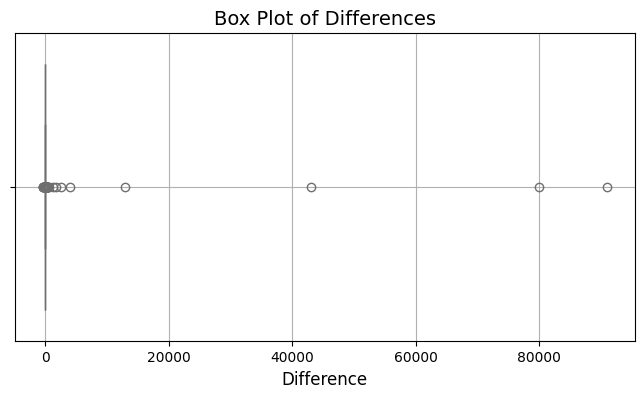

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_table['difference'] = merged_table['total_paid'] - merged_table['unit_price_total']
merged_table = merged_table.dropna(subset=['difference'])

plt.figure(figsize=(8, 4))
sns.boxplot(x=merged_table['difference'], color='skyblue')
plt.title("Box Plot of Differences", fontsize=14)
plt.xlabel("Difference", fontsize=12)
plt.grid(True)
plt.show()



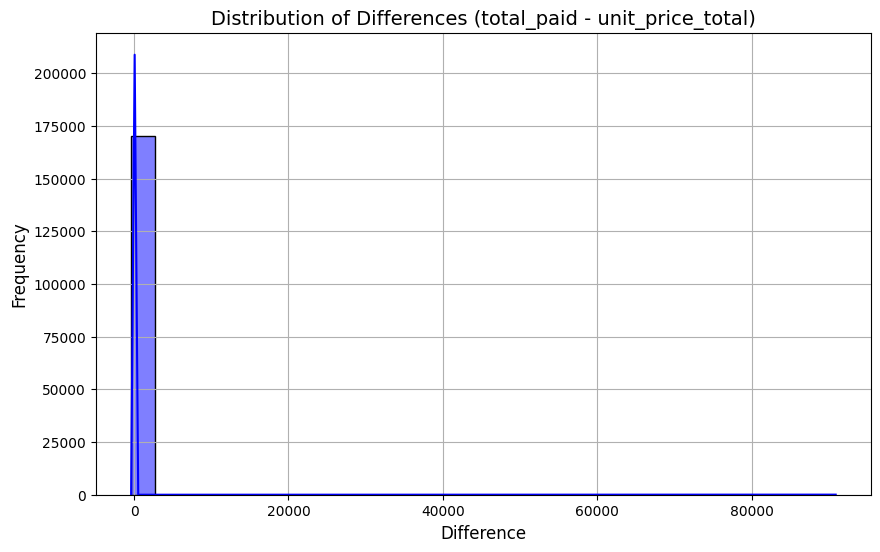

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_table['difference'] =merged_table['total_paid'] - merged_table['unit_price_total']
merged_table = merged_table.dropna(subset=['difference'])

plt.figure(figsize=(10, 6))
sns.histplot(merged_table['difference'], bins=30, kde=True, color='blue')
plt.title("Distribution of Differences (total_paid - unit_price_total)", fontsize=14)
plt.xlabel("Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   216250 non-null  int64  
 1   id_order             216250 non-null  int64  
 2   product_id           216250 non-null  int64  
 3   product_quantity     216250 non-null  int64  
 4   sku                  216250 non-null  object 
 5   unit_price           216250 non-null  float64
 6   date                 216250 non-null  object 
 7   filtered_orderlines  216250 non-null  bool   
 8   unit_price_total     216250 non-null  float64
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 13.4+ MB


### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?
 Other Plausible Explanations:
Discounts or Promotions: Discounts might be applied at the cart level or per product, reducing total_paid relative to unit_price_total.
Tax Handling: Taxes might be included in total_paid but not in unit_price_total (or vice versa), leading to discrepancies.
Rounding Errors: Small rounding differences might occur due to currency or precision limits in calculations.
Payment Adjustments: Additional charges (e.g., handling fees) or refunds might cause variations.
Data Errors: Errors in the data, such as incorrect unit prices, quantities, or totals, could introduce unexpected differences.

### If there are differences that you can’t explain: what should you do with these orders?

In [ ]:
# your code here

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [ ]:
# your thoughts & code here

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

#orders_quality_controlled.to_csv("orders_qu.csv", index=False)
#files.download("orders_qu.csv")

#orderlines_quality_controlled.to_csv("orderlines_qu.csv", index=False)
#files.download("orderlines_qu.csv")